<a href="https://colab.research.google.com/github/MouseLand/cellpose/blob/main/notebooks/test_Cellpose-SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellpose-SAM: superhuman generalization for cellular segmentation

Marius Pachitariu, Michael Rariden, Carsen Stringer

[paper](https://www.biorxiv.org/content/10.1101/2025.04.28.651001v1) | [code](https://github.com/MouseLand/cellpose)

This notebook explains processing example 2D and 3D images using the Cellpose package on Google Colab using the GPU.

### Make sure you have GPU access enabled by going to Runtime -> Change Runtime Type -> Hardware accelerator and selecting GPU

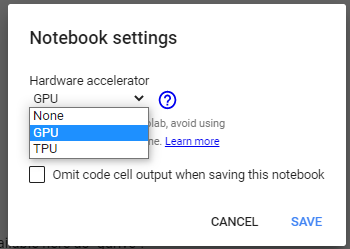

### Install Cellpose-SAM

In [1]:
!pip install git+https://www.github.com/mouseland/cellpose.git

  Cloning https://www.github.com/mouseland/cellpose.git to /private/var/folders/5t/3zkcp0dd27s3txcmjn8jl96m0000gq/T/pip-req-build-6iir8l05
  Running command git clone --filter=blob:none --quiet https://www.github.com/mouseland/cellpose.git /private/var/folders/5t/3zkcp0dd27s3txcmjn8jl96m0000gq/T/pip-req-build-6iir8l05


  Resolved https://www.github.com/mouseland/cellpose.git to commit 15eb3c6831ac19e0948dbc38c11016d11d1aacf3


  Preparing metadata (setup.py) ... -

 \

 |

 done


Check GPU and instantiate model - will download weights.

In [2]:
import numpy as np
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt

io.logger_setup() # run this to get printing of progress

#Check if colab notebook instance has GPU access
if core.use_gpu()==False:
  raise ImportError("No GPU access, change your runtime")

model = models.CellposeModel(gpu=True)



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.5.dev23+g15eb3c6 
platform:       	darwin 
python version: 	3.13.0 
torch version:  	2.7.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




2025-06-17 21:18:33,000 [INFO] WRITING LOG OUTPUT TO /Users/ranit/.cellpose/run.log


2025-06-17 21:18:33,001 [INFO] 
cellpose version: 	4.0.5.dev23+g15eb3c6 
platform:       	darwin 
python version: 	3.13.0 
torch version:  	2.7.1


2025-06-17 21:18:33,024 [INFO] ** TORCH MPS version installed and working. **


2025-06-17 21:18:33,025 [INFO] ** TORCH MPS version installed and working. **


2025-06-17 21:18:33,025 [INFO] >>>> using GPU (MPS)


2025-06-17 21:18:34,444 [INFO] Downloading: "https://huggingface.co/mouseland/cellpose-sam/resolve/main/cpsam" to /Users/ranit/.cellpose/models/cpsam



  0%|                                                                                                                                | 0.00/1.15G [00:00<?, ?B/s]

  0%|▏                                                                                                                      | 2.44M/1.15G [00:00<00:48, 25.2MB/s]

  1%|▋                                                                                                                      | 6.96M/1.15G [00:00<00:32, 37.3MB/s]

  1%|█▏                                                                                                                     | 11.5M/1.15G [00:00<00:29, 41.8MB/s]

  1%|█▋                                                                                                                     | 16.2M/1.15G [00:00<00:27, 44.9MB/s]

  2%|██▏                                                                                                                    | 21.4M/1.15G [00:00<00:25, 48.3MB/s]

  2%|██▋                                                                                                                    | 26.4M/1.15G [00:00<00:24, 49.4MB/s]

  3%|███▏                                                                                                                   | 31.2M/1.15G [00:00<00:24, 49.8MB/s]

  3%|███▋                                                                                                                   | 36.0M/1.15G [00:00<00:26, 44.6MB/s]

  3%|████                                                                                                                   | 40.3M/1.15G [00:00<00:29, 40.6MB/s]

  4%|████▍                                                                                                                  | 44.3M/1.15G [00:01<00:29, 40.8MB/s]

  4%|████▉                                                                                                                  | 48.3M/1.15G [00:01<00:29, 39.9MB/s]

  4%|█████▎                                                                                                                 | 52.1M/1.15G [00:01<00:30, 38.9MB/s]

  5%|█████▊                                                                                                                 | 57.4M/1.15G [00:01<00:26, 43.5MB/s]

  5%|██████▎                                                                                                                | 62.6M/1.15G [00:01<00:25, 46.5MB/s]

  6%|██████▊                                                                                                                | 67.5M/1.15G [00:01<00:24, 47.9MB/s]

  6%|███████▍                                                                                                               | 73.1M/1.15G [00:01<00:22, 50.8MB/s]

  7%|███████▉                                                                                                               | 78.6M/1.15G [00:01<00:21, 52.6MB/s]

  7%|████████▍                                                                                                              | 83.6M/1.15G [00:01<00:25, 44.9MB/s]

  8%|█████████▏                                                                                                             | 90.9M/1.15G [00:02<00:21, 53.1MB/s]

  8%|█████████▋                                                                                                             | 96.2M/1.15G [00:02<00:21, 53.1MB/s]

  9%|██████████▍                                                                                                             | 102M/1.15G [00:02<00:20, 55.0MB/s]

  9%|██████████▉                                                                                                             | 108M/1.15G [00:02<00:20, 55.3MB/s]

 10%|███████████▌                                                                                                            | 113M/1.15G [00:02<00:20, 55.7MB/s]

 10%|████████████                                                                                                            | 118M/1.15G [00:02<00:21, 51.7MB/s]

 11%|████████████▌                                                                                                           | 124M/1.15G [00:02<00:20, 52.7MB/s]

 11%|█████████████▏                                                                                                          | 129M/1.15G [00:02<00:20, 53.1MB/s]

 11%|█████████████▋                                                                                                          | 134M/1.15G [00:02<00:24, 44.4MB/s]

 12%|██████████████▎                                                                                                         | 140M/1.15G [00:03<00:22, 49.1MB/s]

 12%|██████████████▊                                                                                                         | 146M/1.15G [00:03<00:20, 51.9MB/s]

 13%|███████████████▍                                                                                                        | 151M/1.15G [00:03<00:22, 47.2MB/s]

 13%|████████████████                                                                                                        | 157M/1.15G [00:03<00:20, 52.3MB/s]

 14%|████████████████▌                                                                                                       | 162M/1.15G [00:03<00:20, 50.7MB/s]

 14%|█████████████████                                                                                                       | 167M/1.15G [00:03<00:21, 48.5MB/s]

 15%|█████████████████▋                                                                                                      | 173M/1.15G [00:03<00:20, 52.2MB/s]

 15%|██████████████████▏                                                                                                     | 179M/1.15G [00:03<00:19, 53.5MB/s]

 16%|██████████████████▊                                                                                                     | 184M/1.15G [00:03<00:20, 51.3MB/s]

 16%|███████████████████▎                                                                                                    | 189M/1.15G [00:04<00:19, 52.5MB/s]

 17%|███████████████████▊                                                                                                    | 194M/1.15G [00:04<00:19, 51.8MB/s]

 17%|████████████████████▍                                                                                                   | 200M/1.15G [00:04<00:19, 53.0MB/s]

 18%|█████████████████████                                                                                                   | 206M/1.15G [00:04<00:18, 55.7MB/s]

 18%|█████████████████████▌                                                                                                  | 211M/1.15G [00:04<00:18, 53.8MB/s]

 18%|██████████████████████                                                                                                  | 217M/1.15G [00:04<00:18, 54.8MB/s]

 19%|██████████████████████▋                                                                                                 | 222M/1.15G [00:04<00:19, 52.6MB/s]

 19%|███████████████████████▏                                                                                                | 228M/1.15G [00:04<00:18, 54.6MB/s]

 20%|███████████████████████▊                                                                                                | 233M/1.15G [00:04<00:17, 55.4MB/s]

 20%|████████████████████████▎                                                                                               | 239M/1.15G [00:05<00:17, 55.9MB/s]

 21%|████████████████████████▉                                                                                               | 244M/1.15G [00:05<00:17, 54.4MB/s]

 21%|█████████████████████████▍                                                                                              | 249M/1.15G [00:05<00:18, 53.4MB/s]

 22%|██████████████████████████                                                                                              | 255M/1.15G [00:05<00:17, 54.6MB/s]

 22%|██████████████████████████▌                                                                                             | 261M/1.15G [00:05<00:17, 55.5MB/s]

 23%|███████████████████████████                                                                                             | 266M/1.15G [00:05<00:18, 50.4MB/s]

 23%|███████████████████████████▌                                                                                            | 271M/1.15G [00:05<00:19, 48.8MB/s]

 23%|████████████████████████████                                                                                            | 276M/1.15G [00:05<00:19, 49.1MB/s]

 24%|████████████████████████████▋                                                                                           | 281M/1.15G [00:05<00:18, 51.6MB/s]

 24%|█████████████████████████████▎                                                                                          | 287M/1.15G [00:05<00:17, 53.3MB/s]

 25%|█████████████████████████████▊                                                                                          | 292M/1.15G [00:06<00:17, 54.2MB/s]

 25%|██████████████████████████████▎                                                                                         | 298M/1.15G [00:06<00:16, 54.4MB/s]

 26%|██████████████████████████████▉                                                                                         | 303M/1.15G [00:06<00:16, 55.2MB/s]

 26%|███████████████████████████████▍                                                                                        | 308M/1.15G [00:06<00:16, 53.7MB/s]

 27%|███████████████████████████████▉                                                                                        | 313M/1.15G [00:06<00:17, 51.5MB/s]

 27%|████████████████████████████████▌                                                                                       | 319M/1.15G [00:06<00:16, 53.2MB/s]

 28%|█████████████████████████████████                                                                                       | 325M/1.15G [00:06<00:16, 54.8MB/s]

 28%|█████████████████████████████████▋                                                                                      | 330M/1.15G [00:06<00:17, 50.9MB/s]

 28%|██████████████████████████████████▏                                                                                     | 335M/1.15G [00:07<00:22, 38.8MB/s]

 29%|██████████████████████████████████▊                                                                                     | 341M/1.15G [00:07<00:19, 45.8MB/s]

 29%|███████████████████████████████████▎                                                                                    | 346M/1.15G [00:07<00:18, 47.4MB/s]

 30%|███████████████████████████████████▊                                                                                    | 352M/1.15G [00:07<00:17, 49.6MB/s]

 30%|████████████████████████████████████▍                                                                                   | 357M/1.15G [00:07<00:17, 48.5MB/s]

 31%|████████████████████████████████████▉                                                                                   | 362M/1.15G [00:07<00:17, 49.6MB/s]

 31%|█████████████████████████████████████▍                                                                                  | 367M/1.15G [00:07<00:16, 50.8MB/s]

 32%|█████████████████████████████████████▉                                                                                  | 372M/1.15G [00:07<00:16, 50.9MB/s]

 32%|██████████████████████████████████████▍                                                                                 | 377M/1.15G [00:07<00:16, 50.7MB/s]

 32%|██████████████████████████████████████▉                                                                                 | 382M/1.15G [00:07<00:16, 50.6MB/s]

 33%|███████████████████████████████████████▍                                                                                | 386M/1.15G [00:08<00:16, 49.8MB/s]

 33%|███████████████████████████████████████▉                                                                                | 392M/1.15G [00:08<00:16, 51.3MB/s]

 34%|████████████████████████████████████████▍                                                                               | 397M/1.15G [00:08<00:18, 44.8MB/s]

 34%|█████████████████████████████████████████▎                                                                              | 405M/1.15G [00:08<00:15, 53.8MB/s]

 35%|█████████████████████████████████████████▊                                                                              | 410M/1.15G [00:08<00:14, 54.6MB/s]

 35%|██████████████████████████████████████████▎                                                                             | 415M/1.15G [00:08<00:14, 54.0MB/s]

 36%|██████████████████████████████████████████▉                                                                             | 421M/1.15G [00:08<00:15, 51.6MB/s]

 36%|███████████████████████████████████████████▍                                                                            | 426M/1.15G [00:08<00:17, 45.7MB/s]

 37%|███████████████████████████████████████████▉                                                                            | 431M/1.15G [00:09<00:16, 48.8MB/s]

 37%|████████████████████████████████████████████▌                                                                           | 436M/1.15G [00:09<00:16, 48.2MB/s]

 38%|█████████████████████████████████████████████                                                                           | 442M/1.15G [00:09<00:15, 51.2MB/s]

 38%|█████████████████████████████████████████████▌                                                                          | 447M/1.15G [00:09<00:15, 49.8MB/s]

 38%|██████████████████████████████████████████████▏                                                                         | 453M/1.15G [00:09<00:14, 52.1MB/s]

 39%|██████████████████████████████████████████████▋                                                                         | 458M/1.15G [00:09<00:14, 52.8MB/s]

 39%|███████████████████████████████████████████████▏                                                                        | 463M/1.15G [00:09<00:14, 51.6MB/s]

 40%|███████████████████████████████████████████████▊                                                                        | 468M/1.15G [00:09<00:14, 51.6MB/s]

 40%|████████████████████████████████████████████████▎                                                                       | 473M/1.15G [00:09<00:14, 52.5MB/s]

 41%|████████████████████████████████████████████████▊                                                                       | 478M/1.15G [00:09<00:14, 51.0MB/s]

 41%|█████████████████████████████████████████████████▍                                                                      | 484M/1.15G [00:10<00:13, 53.9MB/s]

 42%|█████████████████████████████████████████████████▉                                                                      | 489M/1.15G [00:10<00:23, 31.0MB/s]

 42%|██████████████████████████████████████████████████▍                                                                     | 495M/1.15G [00:10<00:19, 36.1MB/s]

 43%|███████████████████████████████████████████████████                                                                     | 500M/1.15G [00:10<00:17, 39.9MB/s]

 43%|███████████████████████████████████████████████████▍                                                                    | 505M/1.15G [00:10<00:16, 41.4MB/s]

 43%|████████████████████████████████████████████████████                                                                    | 510M/1.15G [00:10<00:15, 45.5MB/s]

 44%|████████████████████████████████████████████████████▌                                                                   | 516M/1.15G [00:10<00:14, 48.4MB/s]

 44%|█████████████████████████████████████████████████████                                                                   | 521M/1.15G [00:11<00:15, 44.8MB/s]

 45%|█████████████████████████████████████████████████████▌                                                                  | 525M/1.15G [00:11<00:15, 45.0MB/s]

 45%|██████████████████████████████████████████████████████▏                                                                 | 531M/1.15G [00:11<00:13, 49.8MB/s]

 46%|██████████████████████████████████████████████████████▋                                                                 | 536M/1.15G [00:11<00:13, 50.7MB/s]

 46%|███████████████████████████████████████████████████████▏                                                                | 542M/1.15G [00:11<00:12, 51.8MB/s]

 46%|███████████████████████████████████████████████████████▊                                                                | 547M/1.15G [00:11<00:13, 50.6MB/s]

 47%|████████████████████████████████████████████████████████▎                                                               | 552M/1.15G [00:11<00:13, 49.9MB/s]

 47%|████████████████████████████████████████████████████████▊                                                               | 557M/1.15G [00:11<00:12, 51.6MB/s]

 48%|█████████████████████████████████████████████████████████▎                                                              | 562M/1.15G [00:11<00:12, 52.5MB/s]

 48%|█████████████████████████████████████████████████████████▊                                                              | 567M/1.15G [00:12<00:12, 51.1MB/s]

 49%|██████████████████████████████████████████████████████████▎                                                             | 572M/1.15G [00:12<00:12, 51.5MB/s]

 49%|██████████████████████████████████████████████████████████▉                                                             | 577M/1.15G [00:12<00:12, 49.5MB/s]

 50%|███████████████████████████████████████████████████████████▍                                                            | 582M/1.15G [00:12<00:12, 50.7MB/s]

 50%|███████████████████████████████████████████████████████████▉                                                            | 588M/1.15G [00:12<00:11, 51.6MB/s]

 50%|████████████████████████████████████████████████████████████▌                                                           | 593M/1.15G [00:12<00:11, 54.5MB/s]

 51%|█████████████████████████████████████████████████████████████                                                           | 599M/1.15G [00:12<00:10, 55.3MB/s]

 51%|█████████████████████████████████████████████████████████████▋                                                          | 604M/1.15G [00:12<00:10, 55.3MB/s]

 52%|██████████████████████████████████████████████████████████████▏                                                         | 610M/1.15G [00:12<00:12, 47.1MB/s]

 52%|██████████████████████████████████████████████████████████████▋                                                         | 614M/1.15G [00:13<00:13, 42.1MB/s]

 53%|███████████████████████████████████████████████████████████████                                                         | 618M/1.15G [00:13<00:14, 40.6MB/s]

 53%|███████████████████████████████████████████████████████████████▌                                                        | 623M/1.15G [00:13<00:13, 43.0MB/s]

 53%|████████████████████████████████████████████████████████████████▏                                                       | 629M/1.15G [00:13<00:12, 47.3MB/s]

 54%|████████████████████████████████████████████████████████████████▊                                                       | 635M/1.15G [00:13<00:11, 51.2MB/s]

 54%|█████████████████████████████████████████████████████████████████▎                                                      | 640M/1.15G [00:13<00:11, 51.1MB/s]

 55%|█████████████████████████████████████████████████████████████████▊                                                      | 645M/1.15G [00:13<00:10, 51.3MB/s]

 55%|██████████████████████████████████████████████████████████████████▎                                                     | 650M/1.15G [00:13<00:11, 49.5MB/s]

 56%|██████████████████████████████████████████████████████████████████▊                                                     | 655M/1.15G [00:13<00:10, 52.3MB/s]

 56%|███████████████████████████████████████████████████████████████████▎                                                    | 660M/1.15G [00:13<00:10, 51.7MB/s]

 57%|███████████████████████████████████████████████████████████████████▉                                                    | 666M/1.15G [00:14<00:10, 52.5MB/s]

 57%|████████████████████████████████████████████████████████████████████▍                                                   | 671M/1.15G [00:14<00:09, 53.1MB/s]

 57%|████████████████████████████████████████████████████████████████████▉                                                   | 676M/1.15G [00:14<00:09, 54.4MB/s]

 58%|█████████████████████████████████████████████████████████████████████▌                                                  | 682M/1.15G [00:14<00:09, 55.5MB/s]

 58%|██████████████████████████████████████████████████████████████████████                                                  | 687M/1.15G [00:14<00:09, 54.8MB/s]

 59%|██████████████████████████████████████████████████████████████████████▋                                                 | 693M/1.15G [00:14<00:09, 56.0MB/s]

 59%|███████████████████████████████████████████████████████████████████████▏                                                | 698M/1.15G [00:14<00:08, 56.0MB/s]

 60%|███████████████████████████████████████████████████████████████████████▊                                                | 704M/1.15G [00:14<00:09, 50.3MB/s]

 61%|████████████████████████████████████████████████████████████████████████▋                                               | 712M/1.15G [00:14<00:08, 60.8MB/s]

 61%|█████████████████████████████████████████████████████████████████████████▎                                              | 718M/1.15G [00:15<00:07, 60.4MB/s]

 62%|█████████████████████████████████████████████████████████████████████████▉                                              | 724M/1.15G [00:15<00:08, 58.5MB/s]

 62%|██████████████████████████████████████████████████████████████████████████▍                                             | 730M/1.15G [00:15<00:08, 55.3MB/s]

 63%|███████████████████████████████████████████████████████████████████████████                                             | 736M/1.15G [00:15<00:08, 56.4MB/s]

 63%|███████████████████████████████████████████████████████████████████████████▌                                            | 741M/1.15G [00:15<00:09, 49.4MB/s]

 64%|████████████████████████████████████████████████████████████████████████████▍                                           | 749M/1.15G [00:15<00:07, 58.2MB/s]

 64%|█████████████████████████████████████████████████████████████████████████████                                           | 755M/1.15G [00:15<00:08, 54.4MB/s]

 65%|█████████████████████████████████████████████████████████████████████████████▌                                          | 760M/1.15G [00:15<00:08, 54.4MB/s]

 65%|██████████████████████████████████████████████████████████████████████████████                                          | 766M/1.15G [00:15<00:07, 55.0MB/s]

 66%|██████████████████████████████████████████████████████████████████████████████▋                                         | 771M/1.15G [00:16<00:07, 53.3MB/s]

 66%|███████████████████████████████████████████████████████████████████████████████▏                                        | 777M/1.15G [00:16<00:07, 54.4MB/s]

 67%|███████████████████████████████████████████████████████████████████████████████▊                                        | 783M/1.15G [00:16<00:07, 56.0MB/s]

 67%|████████████████████████████████████████████████████████████████████████████████▎                                       | 788M/1.15G [00:16<00:07, 53.5MB/s]

 67%|████████████████████████████████████████████████████████████████████████████████▉                                       | 794M/1.15G [00:16<00:07, 55.2MB/s]

 68%|█████████████████████████████████████████████████████████████████████████████████▌                                      | 799M/1.15G [00:16<00:07, 54.9MB/s]

 68%|██████████████████████████████████████████████████████████████████████████████████                                      | 804M/1.15G [00:16<00:07, 53.1MB/s]

 69%|██████████████████████████████████████████████████████████████████████████████████▌                                     | 810M/1.15G [00:16<00:07, 54.4MB/s]

 69%|███████████████████████████████████████████████████████████████████████████████████▏                                    | 815M/1.15G [00:16<00:06, 55.5MB/s]

 70%|███████████████████████████████████████████████████████████████████████████████████▋                                    | 821M/1.15G [00:17<00:08, 44.6MB/s]

 70%|████████████████████████████████████████████████████████████████████████████████████▌                                   | 829M/1.15G [00:17<00:06, 53.9MB/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████                                   | 834M/1.15G [00:17<00:06, 53.0MB/s]

 71%|█████████████████████████████████████████████████████████████████████████████████████▋                                  | 840M/1.15G [00:17<00:06, 54.5MB/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████▏                                 | 845M/1.15G [00:17<00:07, 45.5MB/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████▉                                 | 852M/1.15G [00:17<00:06, 52.9MB/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████▌                                | 858M/1.15G [00:17<00:06, 53.1MB/s]

 73%|████████████████████████████████████████████████████████████████████████████████████████                                | 863M/1.15G [00:17<00:06, 53.0MB/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████▌                               | 868M/1.15G [00:18<00:06, 52.3MB/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████▏                              | 874M/1.15G [00:18<00:05, 53.5MB/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████▋                              | 879M/1.15G [00:18<00:06, 51.9MB/s]

 75%|██████████████████████████████████████████████████████████████████████████████████████████▏                             | 884M/1.15G [00:18<00:05, 52.3MB/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████▋                             | 889M/1.15G [00:18<00:06, 47.0MB/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████▏                            | 894M/1.15G [00:18<00:06, 48.3MB/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████▋                            | 899M/1.15G [00:18<00:05, 49.8MB/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████▏                           | 904M/1.15G [00:18<00:06, 46.2MB/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████▋                           | 909M/1.15G [00:18<00:06, 45.7MB/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████▏                          | 913M/1.15G [00:19<00:06, 43.1MB/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████▌                          | 917M/1.15G [00:19<00:08, 34.0MB/s]

 78%|██████████████████████████████████████████████████████████████████████████████████████████████                          | 922M/1.15G [00:19<00:07, 36.9MB/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████▍                         | 926M/1.15G [00:19<00:06, 38.1MB/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████▊                         | 930M/1.15G [00:19<00:06, 39.1MB/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████▎                        | 935M/1.15G [00:19<00:05, 43.0MB/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████▉                        | 940M/1.15G [00:19<00:05, 45.9MB/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 945M/1.15G [00:19<00:05, 46.1MB/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████▊                       | 950M/1.15G [00:19<00:05, 43.1MB/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 955M/1.15G [00:20<00:04, 47.9MB/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 960M/1.15G [00:20<00:04, 49.0MB/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 965M/1.15G [00:20<00:04, 50.2MB/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████                     | 971M/1.15G [00:20<00:04, 51.5MB/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 976M/1.15G [00:20<00:04, 51.7MB/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████                    | 981M/1.15G [00:20<00:03, 52.1MB/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 986M/1.15G [00:20<00:04, 45.7MB/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████                   | 991M/1.15G [00:20<00:04, 48.6MB/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 996M/1.15G [00:20<00:03, 49.8MB/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 0.98G/1.15G [00:21<00:03, 47.1MB/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 0.98G/1.15G [00:21<00:03, 47.7MB/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 0.99G/1.15G [00:21<00:03, 47.4MB/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 0.99G/1.15G [00:21<00:03, 47.4MB/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 1.00G/1.15G [00:21<00:03, 47.8MB/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1.00G/1.15G [00:21<00:03, 51.5MB/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 1.01G/1.15G [00:21<00:02, 52.7MB/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1.01G/1.15G [00:21<00:02, 52.6MB/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1.02G/1.15G [00:21<00:02, 47.6MB/s]

 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 1.02G/1.15G [00:21<00:02, 53.8MB/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1.03G/1.15G [00:22<00:02, 51.0MB/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████            | 1.03G/1.15G [00:22<00:02, 51.7MB/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1.04G/1.15G [00:22<00:02, 52.5MB/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1.04G/1.15G [00:22<00:02, 55.2MB/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 1.05G/1.15G [00:22<00:02, 52.6MB/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1.05G/1.15G [00:22<00:01, 54.5MB/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1.06G/1.15G [00:22<00:01, 54.1MB/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1.07G/1.15G [00:22<00:01, 53.7MB/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1.07G/1.15G [00:22<00:01, 52.5MB/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1.08G/1.15G [00:23<00:01, 50.7MB/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1.08G/1.15G [00:23<00:01, 53.3MB/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1.09G/1.15G [00:23<00:01, 55.1MB/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 1.09G/1.15G [00:23<00:01, 56.9MB/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1.10G/1.15G [00:23<00:01, 45.9MB/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1.11G/1.15G [00:23<00:00, 55.4MB/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 1.11G/1.15G [00:23<00:00, 53.4MB/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1.12G/1.15G [00:23<00:00, 52.8MB/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1.12G/1.15G [00:23<00:00, 54.8MB/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 1.13G/1.15G [00:24<00:00, 55.3MB/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1.13G/1.15G [00:24<00:00, 56.1MB/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1.14G/1.15G [00:24<00:00, 53.1MB/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1.14G/1.15G [00:24<00:00, 52.9MB/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1.15G/1.15G [00:24<00:00, 53.7MB/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.15G/1.15G [00:24<00:00, 50.3MB/s]

KeyboardInterrupt: 

### Download example images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import utils, io

# download example 2D images from website
url = "http://www.cellpose.org/static/data/imgs_cyto3.npz"
filename = "imgs_cyto3.npz"
utils.download_url_to_file(url, filename)

# download 3D tiff
url = "http://www.cellpose.org/static/data/rgb_3D.tif"
utils.download_url_to_file(url, "rgb_3D.tif")

dat = np.load(filename, allow_pickle=True)["arr_0"].item()

imgs = dat["imgs"]
masks_true = dat["masks_true"]

plt.figure(figsize=(8,3))
for i, iex in enumerate([9, 16, 21]):
    img = imgs[iex].squeeze()
    plt.subplot(1,3,1+i)
    plt.imshow(img[0], cmap="gray", vmin=0, vmax=1)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Run Cellpose-SAM

In [ ]:
masks_pred, flows, styles = model.eval(imgs, niter=1000) # using more iterations for bacteria


plot results

In [ ]:
from cellpose import transforms, plot

titles = [
        "Cellpose", "Nuclei", "Tissuenet", "Livecell", "YeaZ",
         "Omnipose\nphase-contrast", "Omnipose\nfluorescent",
        "DeepBacs"
    ]

plt.figure(figsize=(12,6))
ly = 400
for iex in range(len(imgs)):
    img = imgs[iex].squeeze().copy()
    img = np.clip(transforms.normalize_img(img, axis=0), 0, 1) # normalize images across channel axis
    ax = plt.subplot(3, 8, (iex%3)*8 + (iex//3) +1)
    if img[1].sum()==0:
        img = img[0]
        ax.imshow(img, cmap="gray")
    else:
        # make RGB from 2 channel image
        img = np.concatenate((np.zeros_like(img)[:1], img), axis=0).transpose(1,2,0)
        ax.imshow(img)
    ax.set_ylim([0, min(400, img.shape[0])])
    ax.set_xlim([0, min(400, img.shape[1])])


    # GROUND-TRUTH = PURPLE
    # PREDICTED = YELLOW
    outlines_gt = utils.outlines_list(masks_true[iex])
    outlines_pred = utils.outlines_list(masks_pred[iex])
    for o in outlines_gt:
        plt.plot(o[:,0], o[:,1], color=[0.7,0.4,1], lw=0.5)
    for o in outlines_pred:
        plt.plot(o[:,0], o[:,1], color=[1,1,0.3], lw=0.75, ls="--")
    plt.axis('off')

    if iex%3 == 0:
        ax.set_title(titles[iex//3])

plt.tight_layout()
plt.show()

# Run Cellpose-SAM in 3D

There are two ways to run cellpose in 3D, this cell shows both, choose which one works best for you.

First way: computes flows from 2D slices and combines into 3D flows to create masks



In [ ]:
img_3D = io.imread("rgb_3D.tif")


# 1. computes flows from 2D slices and combines into 3D flows to create masks
masks, flows, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                batch_size=32,
                                do_3D=True, flow3D_smooth=1)


Second way: computes masks in 2D slices and stitches masks in 3D based on mask overlap

Note stitching (with stitch_threshold > 0) can also be used to track cells over time.

In [ ]:
# 2. computes masks in 2D slices and stitches masks in 3D based on mask overlap
print('running cellpose 2D + stitching masks')
masks_stitched, flows_stitched, _ = model.eval(img_3D, z_axis=0, channel_axis=1,
                                                  batch_size=32,
                                                  do_3D=False, stitch_threshold=0.5)

Results from 3D flows => masks computation

In [ ]:
# DISPLAY RESULTS 3D flows => masks
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)

Results from stitching

In [ ]:
# DISPLAY RESULTS stitching
plt.figure(figsize=(15,3))
for i,iplane in enumerate(np.arange(0,75,10,int)):
  img0 = plot.image_to_rgb(img_3D[iplane, [1,0]].copy(), channels=[2,3])
  plt.subplot(1,8,i+1)
  outlines = utils.masks_to_outlines(masks_stitched[iplane])
  outX, outY = np.nonzero(outlines)
  imgout= img0.copy()
  imgout[outX, outY] = np.array([255,75,75])
  plt.imshow(imgout)
  plt.title('iplane = %d'%iplane)